In [1]:
import imdb_crawler as ic

if __name__ ==  "__main__":
    generos = ['adventure', 'documentary', 'reality_tv', 'game_show']
    pag = 1
    url = 'http://www.imdb.com/search/title/?genres={}&title_type=' \
        'tv_series,mini_series&page={}&ref_=adv_nxt'.format(generos[0], 1)
    ic.crawler_tvseries(tipo="adventure", pagina=106)


N/A% (0 of 201) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

In [58]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
df = pd.DataFrame([])
for genero in ['./output/reality_tv/', './output/documentary/', './output/adventure/']:
    path = Path(genero)
    arqs = path.glob('*.csv')
    for arq in arqs: 
        df = df.append(pd.read_csv(arq.as_posix(), sep=';'))
        break
    

In [88]:
df.head()

,0,1,10,11,2,3,4,5,6,7,...,Elenco,Fim,Genero,Id,Inicio,Link,Nota,Sinopse,Titulo,Votos
0,/title/tt2021540/?ref_=adv_li_tt,Leckere Landpartie - Eine kulinarische Reise,MariaGührer|BrittaKorrell|BeateLang|RitaVitt,NaN,http://www.imdb.com//title/tt2021540/?ref_=adv...,(2011– ),2011,,45 min,Reality-TV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/title/tt7214094/?ref_=adv_li_tt,Carrie Kirsten,NaN,5.0,http://www.imdb.com//title/tt7214094/?ref_=adv...,(2014– ),2014,,10 min,Reality-TV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/title/tt4994472/?ref_=adv_li_tt,Overcooked Vegan,ChristianT.Chan|ChristineNguyen|VictoriaVertuga,NaN,http://www.imdb.com//title/tt4994472/?ref_=adv...,(2015– ),2015,,NaN,Reality-TV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/title/tt1488979/?ref_=adv_li_tt,Streets of Fear,NaN,NaN,http://www.imdb.com//title/tt1488979/?ref_=adv...,(2008– ),2008,,NaN,Reality-TV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/title/tt1409819/?ref_=adv_li_tt,Divine Canine,NaN,NaN,http://www.imdb.com//title/tt1409819/?ref_=adv...,(2007– ),2007,,NaN,Reality-TV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df.columns=['Id', 'Titulo', 'Link', 'Anos', 'Inicio', 'Fim', 'Duracao', 'Genero', 'Nota', 'Sinopse', 'Elenco', 'Votos']

ValueError: Length mismatch: Expected axis has 24 elements, new values have 12 elements

In [71]:
df[df.Titulo.str.lower().str.contains('naked and afraid')]

,Id,Titulo,Link,Anos,Inicio,Fim,Duracao,Genero,Nota,Sinopse,Elenco,Votos
24,tt4791250,Naked and Afraid XL,http://www.imdb.com//title/tt4791250/?ref_=adv...,(2015– ),2015,,42 min,"Adventure, Reality-TV",7.5,A group of amateur survivalists are put to the...,MichaelBrown|StevenLeeHallJr.|AmberHargrove|Gi...,588.0
6,tt3007640,Naked and Afraid,http://www.imdb.com//title/tt3007640/?ref_=adv...,(2013– ),2013,,43 min,"Adventure, Reality-TV",6.7,"Each week, a new pair of total strangers are f...",MichaelBrown|AmandaKaye|AmberHargrove|E.J.Snyder,2355.0


In [64]:
genero = df.Genero.str.get_dummies(', ')
genero.drop('Reality-TV', axis=1, inplace=True)

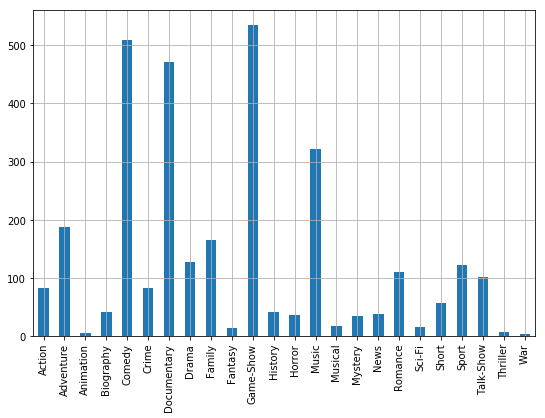

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches((9,6))
genero.sum().plot(kind='bar', ax=ax)
ax.grid();

In [75]:
df.shape

(9999, 12)